## <div class="alert alert-danger">Logistic Regression on Algerian Forest Fire Dataset .<div>

![](https://i.imgur.com/Ms6XMyC.jpg)

## <p style="color:	#00008B;">What is Logistic Regresssion</p>
- Logistic Regression is applied to predict the categorical dependent variable. 
- In other words, it's used when the prediction is categorical like (yes or no), (True or False), (0 or 1)
- The predicted probability or output of logistic regression can be either one of them, and there's no middle ground

## <p style="color:	#00008B;">Advantages of Logisitic Regression</p>
- It is very simple and easy to implement.
- The output is more informative than other classification algorithms
- It expresses the relationship between independent and dependent variables
- Very effective with linearly seperable data

## <p style="color:	#00008B;">Disadvantages of Logisitic Regression</p>
- Not effective with data which are not linearly seperable
- Not as powerful as other classification models
- Multiclass classifications are much easier to do with other algorithms than logisitic regression
- It can only predict categorical outcomes

## Task we have performed
- Reading the dataset
- Checking the null values
- Drop rows which have null values
- Shape of the dataset
- Datatypes and Describe
- Data Cleaning
- Statistical Analysis
- Regression plot
- Handling the outiers
- Logistic Regression Model Training
- Standardizing or Feature Selection
- Accuracy, Precision, Recall, F1-score, Area under Curve, Roc

- Create inbalance dataset from original balanced data
- logistic regression on inbalance data
- Conclusion

## <p style="color:	green;">Importing Required Libraries</p>

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

### To save the model
import pickle

## <p style="color:	green;">Reading the dataset</p>

In [2]:
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\1_Oct_22\Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### <font color=#00008B>Info about dataset and its attributess</font>

1. The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (classes)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### <p style="color:	green;">Checking the null value</p>

In [3]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

### <p style="color:	green;">Drop rows which have null values</p>

In [4]:
df.drop([122,123,167],axis = 0,inplace = True)

### <p style="color:	green;">Shape of the dataset</p>

In [6]:
df.shape

(243, 14)

### Data Cleaning

### <p style="color:	green;">Columns name having extra spaces</p>

In [8]:
columns_with_spaces = [fea for fea in df.columns if " " in fea]
columns_with_spaces

[' RH', ' Ws', 'Rain ', 'Classes  ']

### <p style="color:	green;">Removing the space in feature title</p>

In [10]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### <p style="color:	green;">Function to remove extra space in data</p>

In [11]:
def remove_space(x):
    return x.replace(" ","")

In [12]:
df['Classes'] = df['Classes'].apply(remove_space)

In [13]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire


### <p style="color:	green;">Creating Region feature</p>

In [14]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,notfire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,notfire,0.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,notfire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,notfire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,notfire,1.0


### <p style="color:	green;">Datatypes and Describe</p>

In [15]:
# here it is visible that all datatypes are in object 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.5+ KB


In [16]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,243,31,01,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,243,4,08,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,243,1,2012,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,243,19,35,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,243,62,64,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,243,18,14,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,243,39,0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,243,173,88.9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,243,165,7.9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,243,197,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <p style="color:green;">Convert notfire and fire to 0 and 1 respectively for Classes features</p>

In [18]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [19]:
df['Classes'] = df['Classes'].replace({"notfire":0,'fire':1})
df['Classes'].unique()

array([0, 1], dtype=int64)

### <p style="color:green;">Changing datatype to Numerical from Object</p>

In [20]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
Region         float64
dtype: object

In [21]:
###### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert = {
    'day':'int64', 'month':'int64', 'year':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64', 
    'Rain':'float64', 'FFMC':'float64','DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64',
    'FWI':'float64', 'Classes':'int64', 'Region':'float64'
}

df = df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

#### Observations
- So, all the features are converted from categorical to numerical datatypes

### <p style="color:green;">Now again check the null value and duplicates</p>

In [22]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [23]:
df.duplicated().value_counts()

False    243
dtype: int64

In [24]:
df.shape

(243, 15)

#### Observations
- After data cleaning there are 243 rows and 15 columns.
- There is no null value in dataset.
- There is no duplicate observation in dataset

### <p style="color:green;">Creating a Copy of dataframe from Original Dataframe</p>

In [26]:
data = df.copy()
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


### <p style="color:green;">Statistical Analysis</p>

In [27]:
data.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,78.190729,-0.003639,0.0,3.119138,-9.969476,1.188603,-1.993174,28.544043,53.863133,222.524339,6.632060,65.061368,23.079143,0.891321,0.003639
month,-0.003639,1.242764,0.0,-0.229653,-0.681903,-0.124987,0.077762,0.272433,0.938676,6.722457,0.303838,1.349400,0.685464,0.013298,0.001037
year,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,3.119138,-0.229653,0.0,13.162670,-35.043482,-2.901949,-2.372850,35.222858,21.837668,65.071727,9.101371,23.734918,15.297068,0.930330,0.489984
RH,-9.969476,-0.681903,0.0,-35.043482,219.874333,10.173809,6.604836,-137.215388,-75.071928,-160.400449,-42.298446,-74.653741,-64.096917,-3.184454,-2.991651
Ws,1.188603,-0.124987,0.0,-2.901949,10.173809,7.903887,0.965886,-6.718952,-0.025120,10.604530,0.099643,1.257586,0.677079,-0.097745,-0.255178
Rain,-1.993174,0.077762,0.0,-2.372850,6.604836,0.965886,4.012837,-15.634746,-7.169025,-28.456455,-2.891688,-8.546509,-4.835502,-0.377380,-0.040159
FFMC,28.544043,0.272433,0.0,35.222858,-137.215388,-6.718952,-15.634746,205.912204,107.342972,347.051372,44.113113,120.872510,73.791799,5.487161,1.597815
DMC,53.863133,0.938676,0.0,21.837668,-75.071928,-0.025120,-7.169025,107.342972,153.587434,517.427748,35.032228,173.203205,80.764530,3.606817,1.192729
DC,222.524339,6.722457,0.0,65.071727,-160.400449,10.604530,-28.456455,347.051372,517.427748,2272.009994,100.718521,638.862525,262.277746,12.106907,-1.880308


### <p style="color:green;">Checking the distribution of the features</p>

In [28]:
len(df.columns)

15

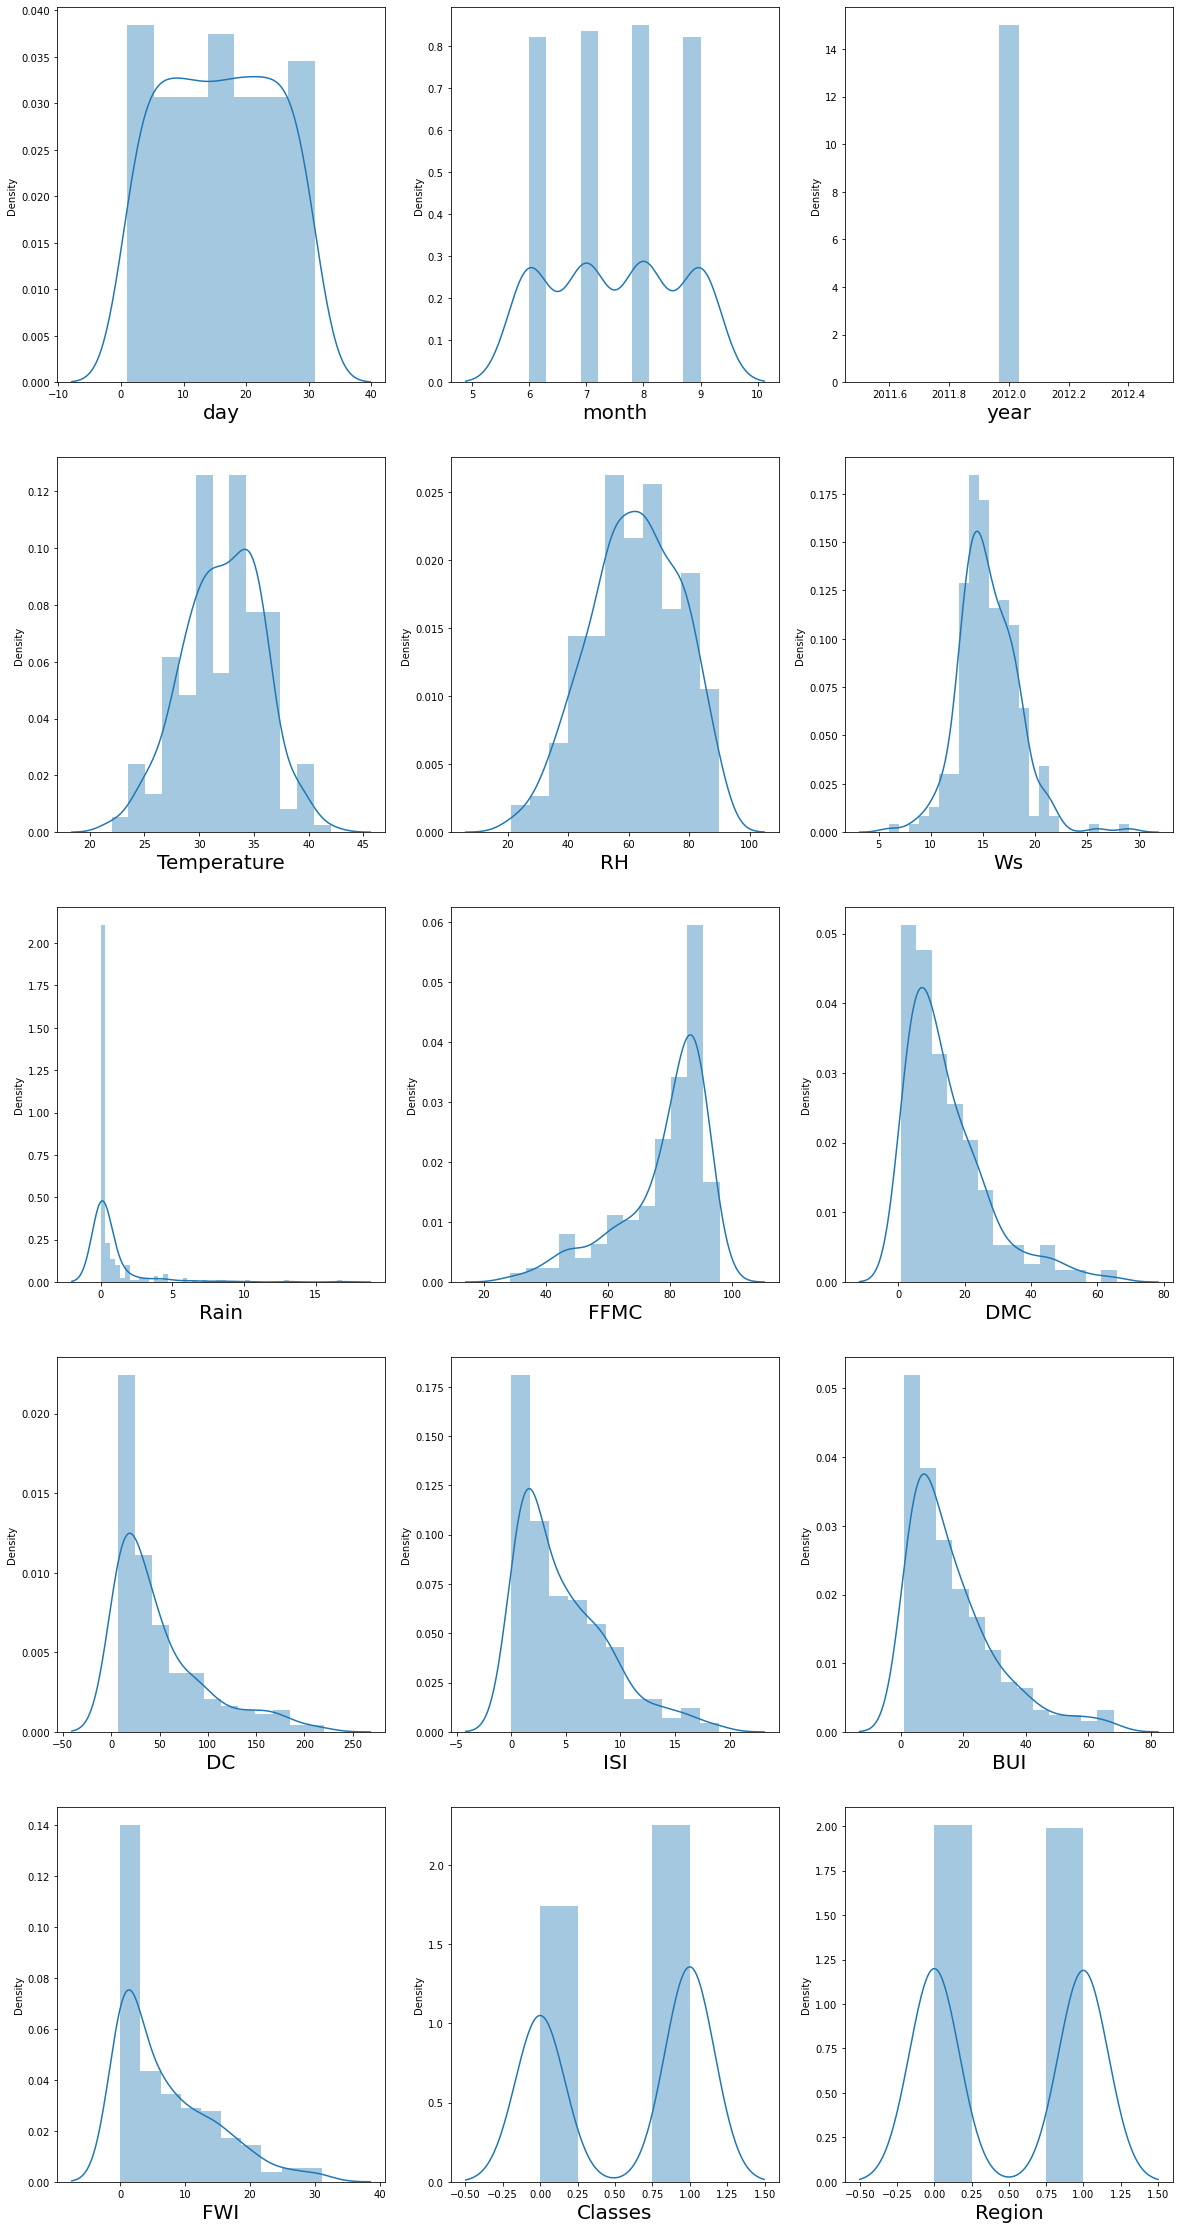

In [29]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 15 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column],kde= True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

### Observation
- Rain, DMC, DC, FWI, ISI, BUI are rightly skewed (log normal distribution)
- There is no variance in the year attribute